In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Threshold

Hai loại: threshold local và threshold global. Threshold có nhiệm vụ là chia các pixel trong ảnh thành hai loại trắng (giá trị cao nhất 255) và đen (giá trị nhỏ nhất 0).

Threshold đơn giản nhất là nếu giá trị pixel (gray scale) lớn hơn một ngưỡng $\theta$ thì thuộc loại trắng, ngược lại thuộc loại đen. Thực hiện bằng hàm `threshold` của OpenCV. 

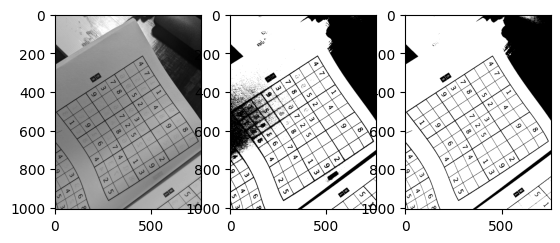

In [2]:
img = cv.imread('images/sudoku.jpg') # ảnh bảng sudoku
height, width = img.shape[:2]
img = cv.resize(img, (width//4, height//4)) # resize lại ảnh cho nhỏ
height, width = img.shape[:2]

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, img_bw1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY) # ngưỡng là 127, lớn hơn 127 thì gán 255
ret, img_bw2 = cv.threshold(img, 100, 255, cv.THRESH_BINARY) # ngưỡng là 100, lớn hơn 100 thì gán 255

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(img_bw1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(img_bw2, cmap='gray', vmin=0, vmax=255)


Loại threshold thuộc loại cục bộ, thực hiện bằng hàm `adaptiveThreshold`. Ở đây, nếu giá trị pixel lớn hơn ngưỡng bằng giá trị cục bộ xung quanh pixel (xác định bằng các bộ lọc: trung bình, gaussian) thì sẽ được gán giá trị lớn nhất (ví dụ: 255). 

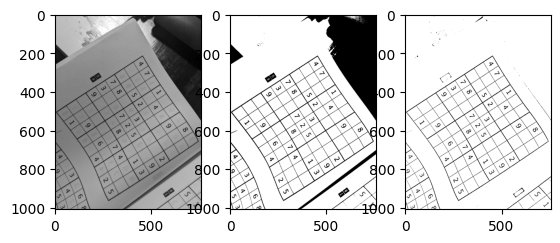

In [3]:
img = cv.imread('images/sudoku.jpg') # ảnh bảng sudoku
height, width = img.shape[:2]
img = cv.resize(img, (width//4, height//4)) # resize lại ảnh cho nhỏ
height, width = img.shape[:2]

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, img_bw1 = cv.threshold(img, 100, 255, cv.THRESH_BINARY) # ngưỡng là 100, lớn hơn 100 thì gán 255
img_bw2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, \
                               33, 50) # ngưỡng được tính bằng bộ lọc gaussian kích thước 33, trừ đi giá trị hằng bằng 50

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(img_bw1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(img_bw2, cmap='gray', vmin=0, vmax=255)


Threshold thuộc loại global sử dụng thuật toán Otsu thì giá trị threshold $\theta$ được tạo ra tự động dựa vào input ảnh đầu vào.

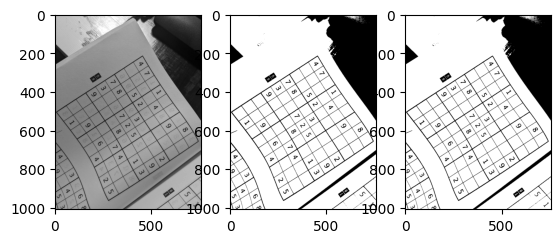

In [4]:
img = cv.imread('images/sudoku.jpg') # ảnh bảng sudoku
height, width = img.shape[:2]
img = cv.resize(img, (width//4, height//4)) # resize lại ảnh cho nhỏ
height, width = img.shape[:2]

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, img_bw1 = cv.threshold(img, 100, 255, cv.THRESH_BINARY) # ngưỡng là 100, lớn hơn 100 thì gán 255
ret, img_bw2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # ngưỡng được tự động xác định bằng thuật toán Otsu

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(img_bw1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(img_bw2, cmap='gray', vmin=0, vmax=255)
